<a href="https://colab.research.google.com/github/Nilanjan1210/HEALTHCARE-INSURANCE-CHARGES-PREDICTION/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Objective**

To build a predictive regression model to estimate individual medical insurance charges based on personal and lifestyle features, and identify the most influential factors contributing to high medical costs.




In [5]:
#  Import Libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [6]:
url = "https://raw.githubusercontent.com/Nilanjan1210/HEALTHCARE-INSURANCE-CHARGES-PREDICTION/main/insurance.csv"
df = pd.read_csv(url)


In [7]:
print(df.head())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
# Data Description
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# missing value check
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [10]:
# duplicate value check
print(df.duplicated().sum())

1


In [11]:
# duplicated value view
print(df[df.duplicated()])

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [12]:
# remove duplicate values
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [13]:
# To check the column name
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

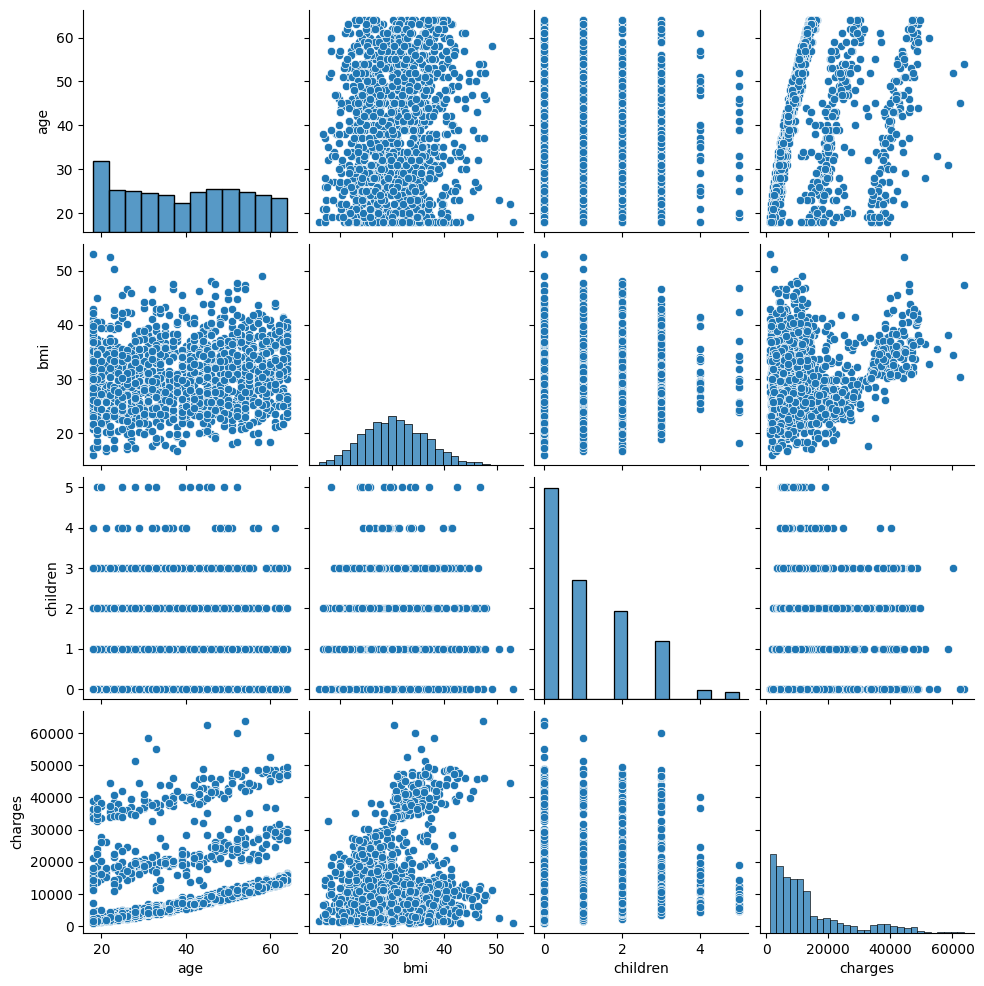

In [14]:
# Pairplot of the numaric dataset
sns.pairplot(df, palette='flare')
plt.show()

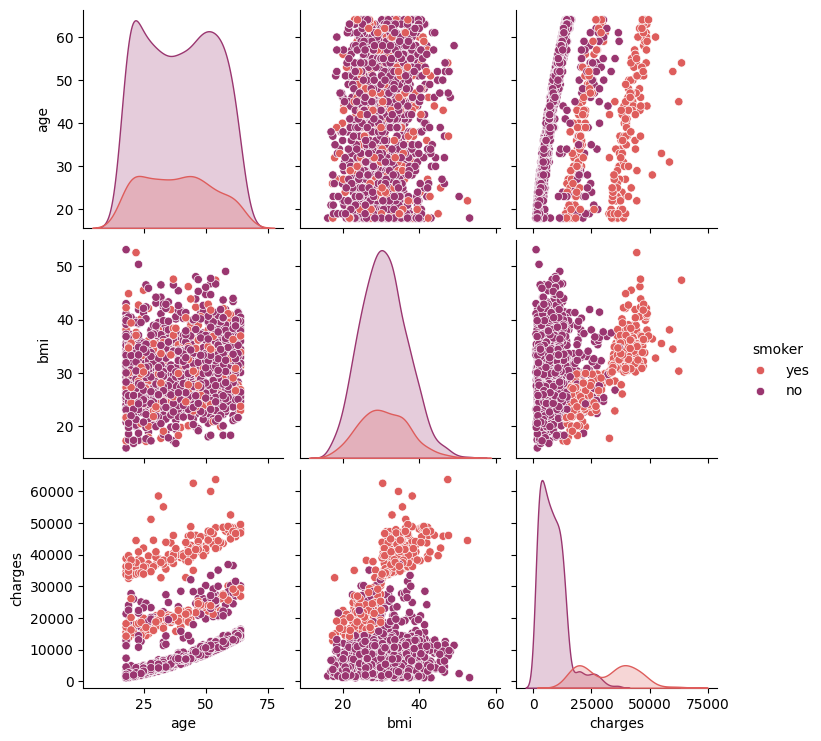

In [15]:
# pairplot of age, bmi, charges with hue on smoker
sns.pairplot(df[['age', 'bmi', 'charges', 'smoker']], hue='smoker', palette='flare')
plt.show()

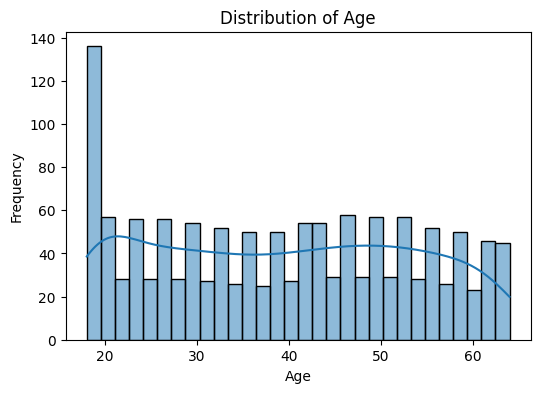

In [16]:
# Distribution of 'age'
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [17]:
print("Minimum of Age of Dataset: ",df.age.min(),"\nMaximum of Age of Dataset : ", df.age.max())

Minimum of Age of Dataset:  18 
Maximum of Age of Dataset :  64


The *WHO (World Health Organization)* and various other sources generally define these age groups as follows: **Young (15-24), Adult (25-40), Middle-aged (40-59), and Senior/Elderly (60+).**

In [18]:
df['age_group'] = pd.cut(df['age'], bins=[15, 24, 40, 60, 100], labels=['young', 'adult', 'middle-aged', 'senior'])

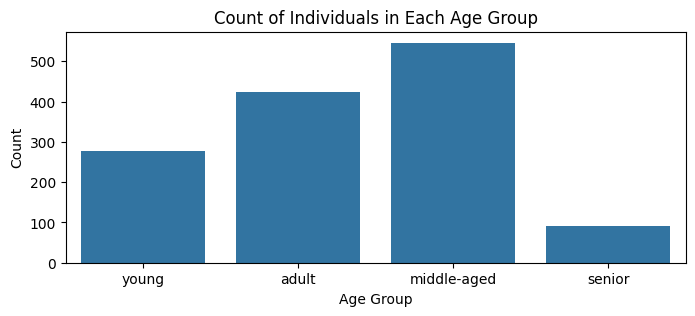

In [19]:
# Plotting age_group count in specific order
plt.figure(figsize=(8, 3))
# Define the desired order for the age groups
age_group_order = ['young', 'adult', 'middle-aged', 'senior']
sns.countplot(x='age_group', data=df, order=age_group_order)
plt.title('Count of Individuals in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


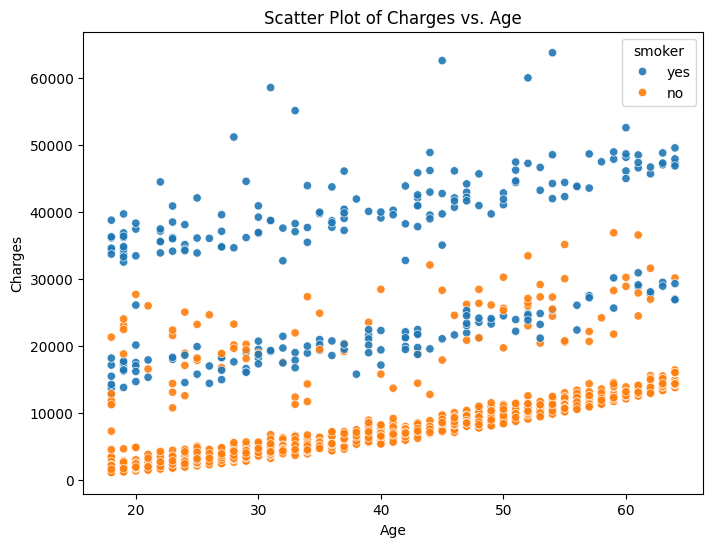

In [20]:

# Price vs. Age
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='charges', hue='smoker',data=df, alpha=0.9)
plt.title('Scatter Plot of Charges vs. Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

# Conclusion: The scatter plot visually demonstrates a general upward trend in insurance charges as age increases. However, there is considerable variability in charges within each age group, suggesting that other factors also play a significant role in determining costs.

# Comment: This plot confirms the intuitive understanding that older individuals tend to have higher medical expenses, which translates to higher insurance charges. Further analysis is needed to quantify this relationship and explore the influence of other variables.

In adults, a Body Mass Index (BMI) of 30 or higher is classified as obese. BMI is a measure of body fat based on height and weight, and a BMI of 25 to 29.9 is considered overweight. While BMI is a useful screening tool, it doesn't diagnose body fatness or health, and other factors like waist circumference and individual health risks should also be considered.

In [38]:

df['is_obese'] = np.where(df['bmi'] >= 30, 'yes', 'no')
print(df.head())

   age     sex     bmi  children smoker     region      charges age_group  \
0   19  female  27.900         0    yes  southwest  16884.92400     young   
1   18    male  33.770         1     no  southeast   1725.55230     young   
2   28    male  33.000         3     no  southeast   4449.46200     adult   
3   33    male  22.705         0     no  northwest  21984.47061     adult   
4   32    male  28.880         0     no  northwest   3866.85520     adult   

  is_obese  
0       no  
1      yes  
2      yes  
3       no  
4       no  


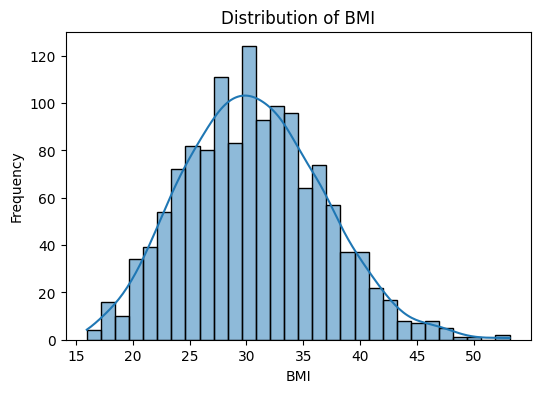

In [22]:
# Distribution of 'bmi'
plt.figure(figsize=(6, 4))
sns.histplot(df['bmi'], kde=True, bins=30)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

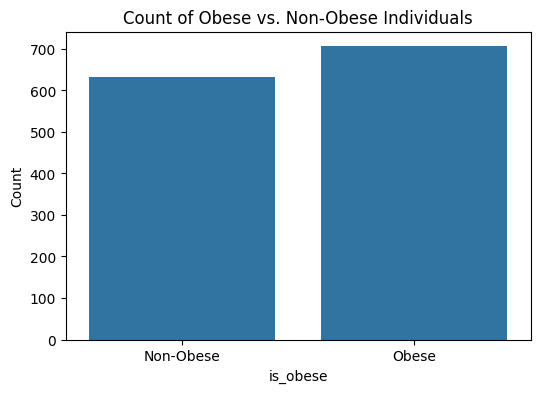

In [23]:
# prompt: is_obese count plot and comment

# Count plot for 'is_obese'
plt.figure(figsize=(6, 4))
sns.countplot(x='is_obese', data=df)
plt.title('Count of Obese vs. Non-Obese Individuals')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Obese', 'Obese']) # Custom labels for better readability
plt.show()


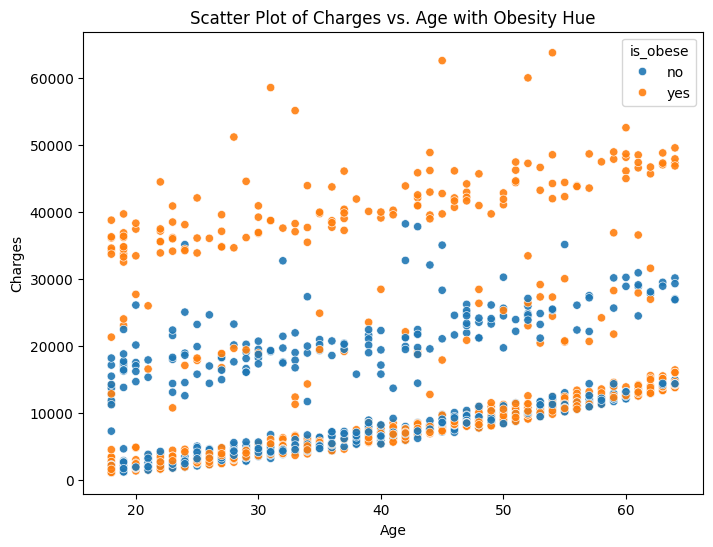

In [24]:

# age vs price with hue is_obese
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='charges', hue='is_obese', data=df, alpha=0.9)
plt.title('Scatter Plot of Charges vs. Age with Obesity Hue')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

In [25]:
# prompt: using group by function usig smoker is_obese use to create a dataframe

df_grouped_smoker_obese = df.groupby(['smoker', 'is_obese'])['charges'].mean().reset_index()
df_grouped_smoker_obese

,smoker,is_obese,charges
0,no,no,7977.029520
1,no,yes,8855.531349
2,yes,no,21363.217016
3,yes,yes,41557.989840


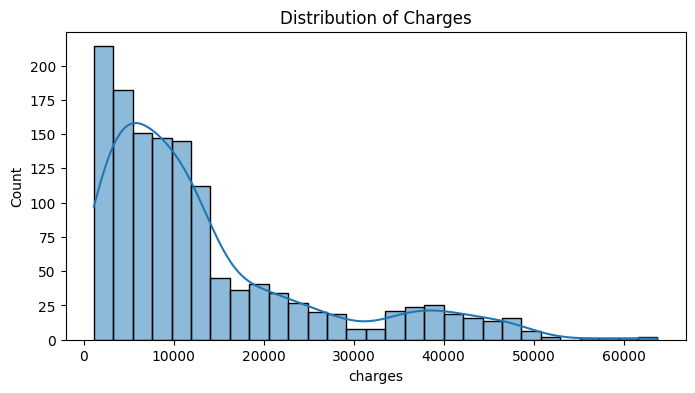

In [26]:
# Distribution of Charges

plt.figure(figsize=(8, 4))
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Charges')
plt.show()

# Outliers


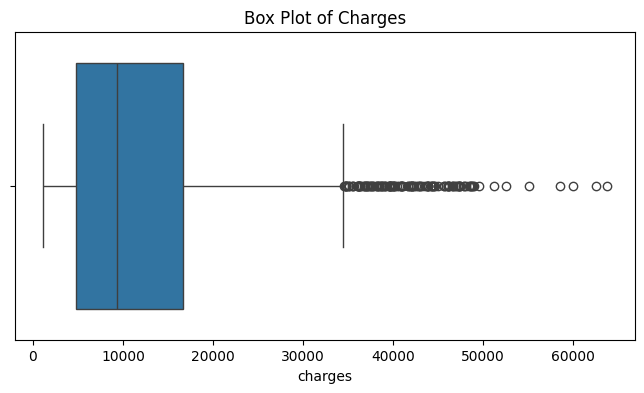

In [27]:
# Checking for outliers in 'charges' using box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['charges'])
plt.title('Box Plot of Charges')
plt.show()

# Conclusion: The box plot for 'charges' clearly indicates the presence of a significant number of outliers, particularly on the higher end of the spectrum. These outliers represent individuals with unusually high medical insurance costs compared to the majority of the dataset.

In [41]:
# Using IQR method to detect outliers in 'charges'
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['charges'] < lower_bound) | (df['charges'] > upper_bound)]
df_cleaned = df[(df['charges'] >= lower_bound) & (df['charges'] <= upper_bound)].copy()

print("Number of outliers detected in 'charges':", len(outliers))
print("\nOutliers in 'charges':")
outliers

Number of outliers detected in 'charges': 139

Outliers in 'charges':


,age,sex,bmi,children,smoker,region,charges,age_group,is_obese
14,27,male,42.130,0,yes,southeast,39611.75770,adult,yes
19,30,male,35.300,0,yes,southwest,36837.46700,adult,yes
23,34,female,31.920,1,yes,northeast,37701.87680,adult,yes
29,31,male,36.300,2,yes,southwest,38711.00000,adult,yes
30,22,male,35.600,0,yes,southwest,35585.57600,young,yes
...,...,...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309,middle-aged,yes
1301,62,male,30.875,3,yes,northwest,46718.16325,senior,yes
1303,43,male,27.800,0,yes,southwest,37829.72420,middle-aged,no
1313,19,female,34.700,2,yes,southwest,36397.57600,young,yes


In [42]:
# Display descriptive statistics for the outliers
print("\nDescriptive statistics of the identified outliers:")
print(outliers.describe())
print("\nDescriptive statistics of the Cleaned Dataset:")
print(df_cleaned.describe())



Descriptive statistics of the identified outliers:
              age         bmi    children       charges
count  139.000000  139.000000  139.000000    139.000000
mean    41.079137   35.564604    1.187050  42103.947206
std     13.801420    4.434917    1.126546   5582.168107
min     18.000000   22.895000    0.000000  34617.840650
25%     30.000000   32.667500    0.000000  37786.149950
50%     43.000000   35.200000    1.000000  40974.164900
75%     52.500000   37.660000    2.000000  45786.706425
max     64.000000   52.580000    4.000000  63770.428010

Descriptive statistics of the Cleaned Dataset:
               age          bmi     children       charges
count  1198.000000  1198.000000  1198.000000   1198.000000
mean     39.006678    30.094787     1.085142   9934.671758
std      14.062040     6.013044     1.214407   7240.216987
min      18.000000    15.960000     0.000000   1121.873900
25%      26.000000    25.800000     0.000000   4418.591062
50%      39.000000    29.735000     1.0000

In [30]:
# Examine the distribution of key features within the outliers
print("\nDistribution of key features within the outliers:")
for feature in ["smoker", "age_group", "region", "children","is_obese" ]:
  print("-------------", feature, "----------------")
  print(outliers[feature].value_counts())


Distribution of key features within the outliers:
------------- smoker ----------------
smoker
yes    136
no       3
Name: count, dtype: int64
------------- age_group ----------------
age_group
middle-aged    61
adult          42
young          23
senior         13
Name: count, dtype: int64
------------- region ----------------
region
southeast    57
southwest    34
northeast    28
northwest    20
Name: count, dtype: int64
------------- children ----------------
children
0    52
2    34
1    32
3    19
4     2
Name: count, dtype: int64
------------- is_obese ----------------
is_obese
yes    134
no       5
Name: count, dtype: int64


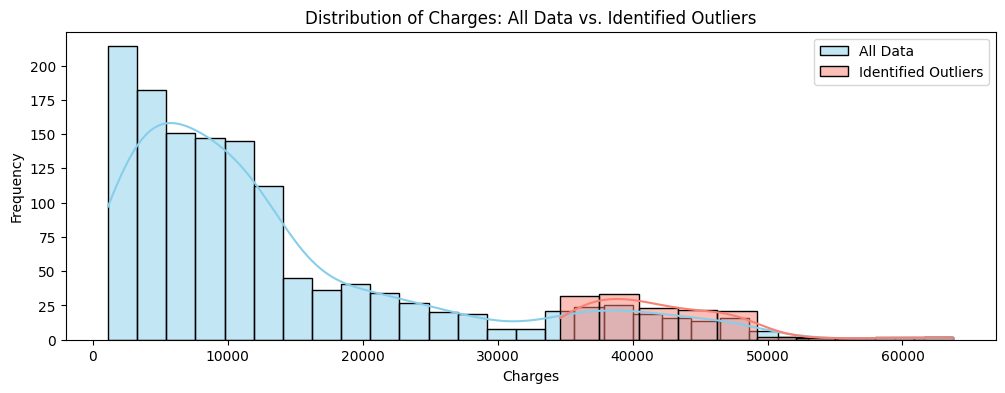

In [31]:
# Visualize the distribution of charges for outliers compared to the rest of the data
plt.figure(figsize=(12, 4))
sns.histplot(df['charges'], kde=True, label='All Data', color='skyblue')
sns.histplot(outliers['charges'], kde=True, label='Identified Outliers', color='salmon')
plt.title('Distribution of Charges: All Data vs. Identified Outliers')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.legend()
plt.show()

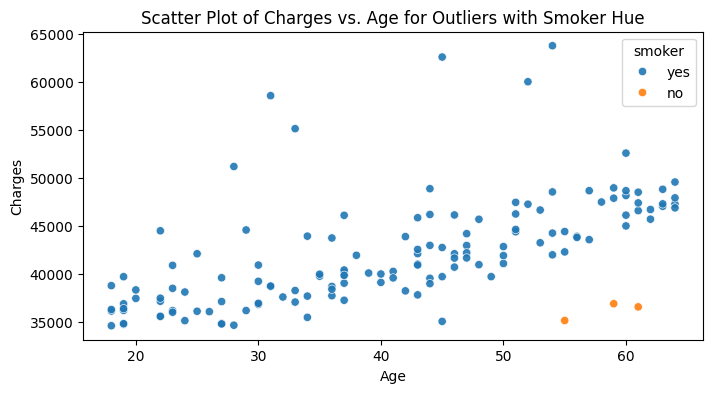

In [32]:
# Visualize the relationship between age, charges, and smoker status for outliers
plt.figure(figsize=(8, 4))
sns.scatterplot(x='age', y='charges', hue='smoker', data=outliers, alpha=0.9)
plt.title('Scatter Plot of Charges vs. Age for Outliers with Smoker Hue')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


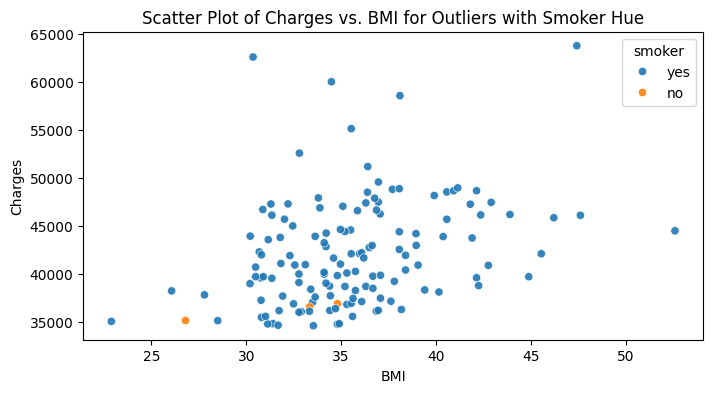

In [33]:
# Visualize the relationship between bmi, charges, and smoker status for outliers
plt.figure(figsize=(8, 4))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=outliers, alpha=0.9)
plt.title('Scatter Plot of Charges vs. BMI for Outliers with Smoker Hue')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

In [34]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_group,is_obese
0,19,female,27.900,0,yes,southwest,16884.92400,young,no
1,18,male,33.770,1,no,southeast,1725.55230,young,yes
2,28,male,33.000,3,no,southeast,4449.46200,adult,yes
3,33,male,22.705,0,no,northwest,21984.47061,adult,no
4,32,male,28.880,0,no,northwest,3866.85520,adult,no
